<a href="https://www.kaggle.com/code/emreustundag/imdb-sentiment-analysis-rnn?scriptVersionId=110108122" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## IMDB Reviews Sentiment Analysis Using Recurrent Neural Network (RNN)

Outline of the project:

* [Introduction](#1)
* [Packages & Libraries](#3)
    * [Data Import](#4)
* [Basic EDA and Visualization](#5)
* [Data Preprocessing](#6)
* [RNN Model](#7)
* [Evaluation](#8)

<a id = "1"></a>
### Introduction
<img src="https://www.malumatfurus.org/wp-content/uploads/imdb-en-iyi-250-film.jpg">

**Background:** IMDb (an abbreviation of Internet Movie Database) is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. In addition, sentiment analysis (also known as opinion mining or emotion AI) is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. You can use sentiment analysis to analyse consumer comments, for example you can run sentiment analysis algorithms on such text snippets after collecting input through various mediums such as Twitter and Facebook to assess your customers’ attitudes toward your product.

Sources: [Wikipedia](https://www.cancer.org/cancer/breast-cancer/about/what-is-breast-cancer.html)
         [Medium](https://medium.com/@pyashpq56/sentiment-analysis-on-imdb-movie-review-d004f3e470bd)


**Motivation:** The Movie Review Analysis is type of customer feedback analysis here, we’ll walk through the steps of creating a model that can perform sentiment analysis on a big movie database. The information was gathered from the Internet Movie Database (IMDb). The main goal is to estimate the sentiment many movie reviews from the Internet Movie Database (IMDb).

<a id = "2"></a>
### Packages and Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

import warnings
warnings.filterwarnings("ignore")

<a id = "3"></a>
#### Data Import

In [2]:
# data import from keras api
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(
                                                    path="imdb.npz",
                                                    num_words=None,
                                                    skip_top=0,
                                                    maxlen=None,
                                                    seed=113,
                                                    start_char=1,
                                                    oov_char=2,
                                                    index_from=3)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
# Manipulating train and test data
x_train = np.concatenate((X_train, X_test[:15000]), axis = 0)
x_test = X_test[15000:]
y_train = np.hstack((Y_train, Y_test[:15000]))
y_test = Y_test[15000:]

In [4]:
print("X train shape: ", x_train.shape)
print("Y train shape: ", y_train.shape)
print("X test shape: ", x_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (40000,)
Y train shape:  (40000,)
X test shape:  (10000,)
Y test shape:  (10000,)


<a id = "4"></a>
### EDA and Visualization

In [5]:
print("Y train values: ", np.unique(y_train))
print("Y test values: ", np.unique(y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [6]:
unique, counts = np.unique(y_train, return_counts = True)
print("Y train distribution: ", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts = True)
print("Y test distribution: ", dict(zip(unique, counts)))

Y train distribution:  {0: 20027, 1: 19973}
Y test distribution:  {0: 4973, 1: 5027}


12500 positive and 12500 negative reviews in dataset. We can also see them in countplots.

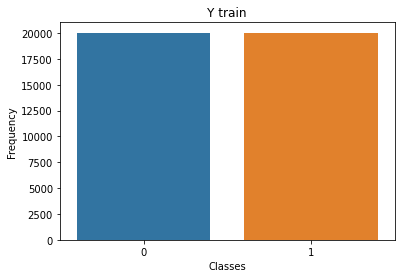

In [7]:
plt.figure()
sns.countplot(y_train)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Y train")
plt.show()

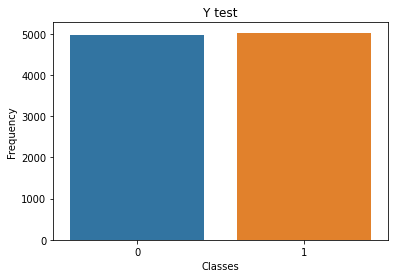

In [8]:
plt.figure()
sns.countplot(y_test)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Y test")
plt.show()

In [9]:
# first review's vector
d = x_train[0]
print(d)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [10]:
# vector's length
len(d)

218

In [11]:
# review length for each X train and X test data
review_len_train = []
review_len_test = []
for i, j in zip(x_train, x_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))

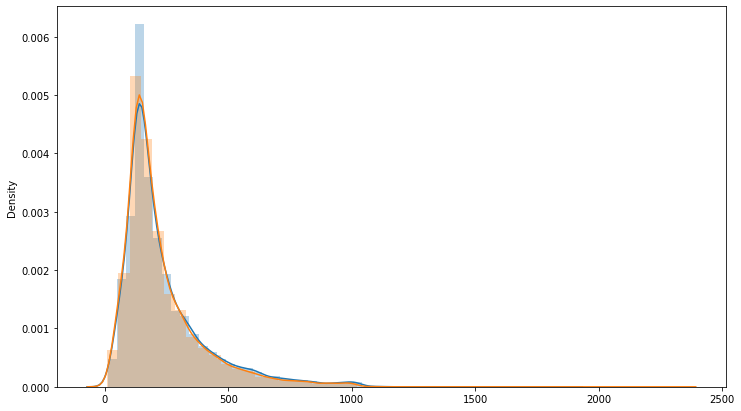

In [12]:
plt.figure(figsize = (12, 7))
sns.distplot(review_len_train, hist_kws = {"alpha" : 0.3})
sns.distplot(review_len_test, hist_kws = {"alpha" : 0.3})
plt.show()

As we can see from the plot each class has the positive skewness.

In [13]:
print("Train mean: ", np.mean(review_len_train))
print("Test mean: ", np.mean(review_len_test))
print("Train mode: ", stats.mode(review_len_train))
print("Test mode: ", stats.mode(review_len_test))

Train mean:  238.863
Test mean:  228.7783
Train mode:  ModeResult(mode=array([130]), count=array([90]))
Test mode:  ModeResult(mode=array([125]), count=array([82]))


Our train mode is 130 which means we will set our maximum number of words for each reviews to about 130 in preprocessing stage.

In [14]:
# number of words
word_index = imdb.get_word_index()
print("Length word index: ", len(word_index))

1654784/1641221 [==============================] - 0s 0us/step
Length word index:  88584


Too many words in reviews so we have to reduce them in preprocessing stage.

In [15]:
# what is the most used word in the reviews
for keys, values in word_index.items():
    if values == 1:
        print(keys)

the


In [16]:
def whatItSay(index = 2):
    
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in x_train[index]])
    print(decode_review)
    print(y_train[index])
    return decode_review

decoded_review = whatItSay(5)

! begins better than it ends funny that the russian submarine crew outperforms all other actors it's like those scenes where documentary shots br br spoiler part the message dechifered was contrary to the whole story it just does not mesh br br
0


<a id = "5"></a>
### Preprocessing

In [17]:
# reducing number of words to 15000 from 88584
num_words = 15000

# data re-import from keras api
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# to resize all review vectors to the same dimension. why 130? please look at EDA section again
maxlen = 130
x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen = maxlen)

In [18]:
# a review sample after sequence padding
print(x_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


In [19]:
# lets look at a review after sequence padding. ! is an unknown word
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


<a id = "6"></a>
### RNN Model

In [20]:
# num_words: 15000, maxlen: 130
rnn = Sequential()
rnn.add(Embedding(input_dim = num_words, output_dim = 32, input_length = maxlen))
rnn.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences = False, activation = "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())

rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

2022-11-05 11:15:18.183533: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 32)           480000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# Training RNN Model
history = rnn.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 8, batch_size = 128, verbose = 1)

Epoch 1/8


2022-11-05 11:15:18.518612: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


196/196 [==============================] - 19s 87ms/step - loss: 0.5300 - accuracy: 0.7364 - val_loss: 0.4529 - val_accuracy: 0.7745
Epoch 2/8
196/196 [==============================] - 16s 82ms/step - loss: 0.3001 - accuracy: 0.8771 - val_loss: 0.3807 - val_accuracy: 0.8365
Epoch 3/8
196/196 [==============================] - 17s 86ms/step - loss: 0.2295 - accuracy: 0.9080 - val_loss: 0.3351 - val_accuracy: 0.8519
Epoch 4/8
196/196 [==============================] - 16s 84ms/step - loss: 0.1941 - accuracy: 0.9246 - val_loss: 0.3302 - val_accuracy: 0.8604
Epoch 5/8
196/196 [==============================] - 17s 87ms/step - loss: 0.1645 - accuracy: 0.9381 - val_loss: 0.8908 - val_accuracy: 0.8173
Epoch 6/8
196/196 [==============================] - 17s 86ms/step - loss: 0.1475 - accuracy: 0.9453 - val_loss: 0.4305 - val_accuracy: 0.8290
Epoch 7/8
196/196 [==============================] - 17s 87ms/step - loss: 0.1271 - accuracy: 0.9536 - val_loss: 0.8128 - val_accuracy: 0.8169
Epoch 8/8

<a id = "7"></a>
### Evaluation

In [22]:
# Evaluate the model
score = rnn.evaluate(x_test, y_test)
print("Accuracy: %", score[1] * 100)

782/782 [==============================] - 12s 16ms/step - loss: 0.4055 - accuracy: 0.8491
Accuracy: % 84.90800261497498


In [23]:
history.history

{'loss': [0.5299515724182129,
  0.3000975251197815,
  0.22945572435855865,
  0.19405268132686615,
  0.16446281969547272,
  0.14749276638031006,
  0.12713976204395294,
  0.11283357441425323],
 'accuracy': [0.7364000082015991,
  0.8771200180053711,
  0.9079599976539612,
  0.9246000051498413,
  0.9380800127983093,
  0.9452800154685974,
  0.9536399841308594,
  0.9592400193214417],
 'val_loss': [0.452913373708725,
  0.38070201873779297,
  0.33510372042655945,
  0.3301505446434021,
  0.8908054828643799,
  0.4305216372013092,
  0.8127691149711609,
  0.4054945409297943],
 'val_accuracy': [0.7745199799537659,
  0.8364800214767456,
  0.8518800139427185,
  0.8604000210762024,
  0.8173199892044067,
  0.8289600014686584,
  0.8168799877166748,
  0.8490800261497498]}

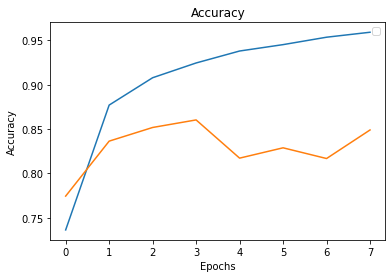

In [24]:
# Accuracy
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

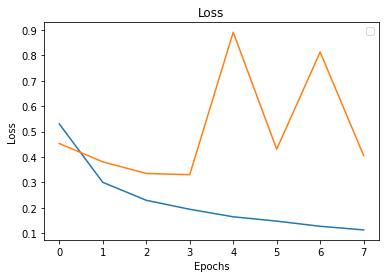

In [25]:
# Loss
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

<img src="https://miro.medium.com/max/880/1*PFI22lMXZFyPpM3wm-IzeQ.jpeg" width = 800, height = 600>

We performed a sentiment analysis on IMDB data implementing a simple RNN model. Thanks a lot and please don't forget to upvote if you like this kernel!